In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report



In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df['class'].unique()
# Here we have changed the value of teh 'g' to zero(0), and the value of 'h' to one(1)

array([0, 1])

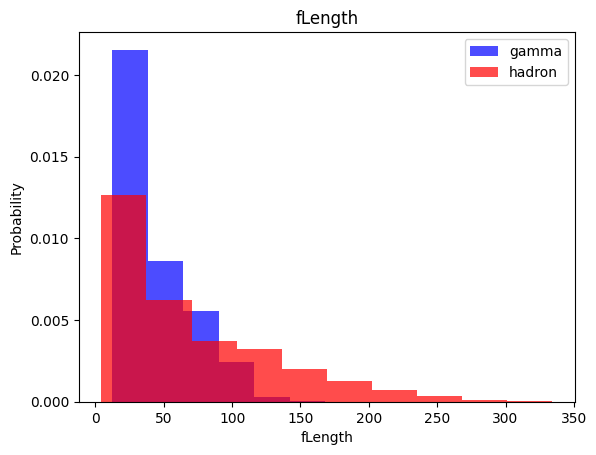

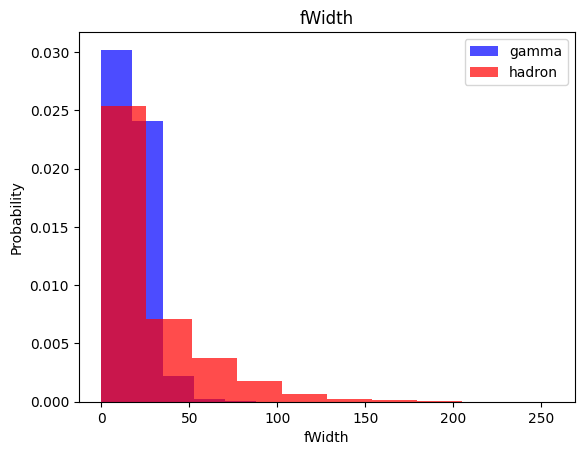

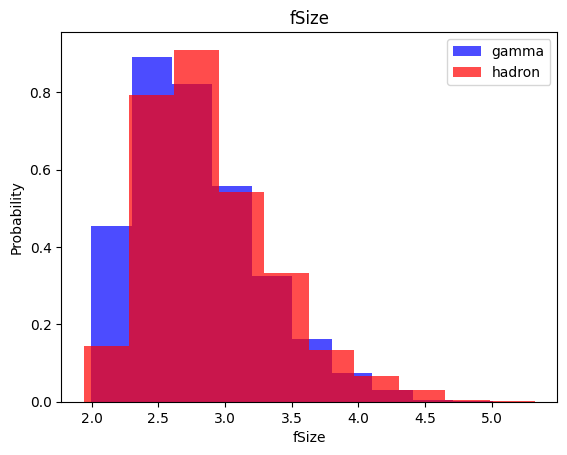

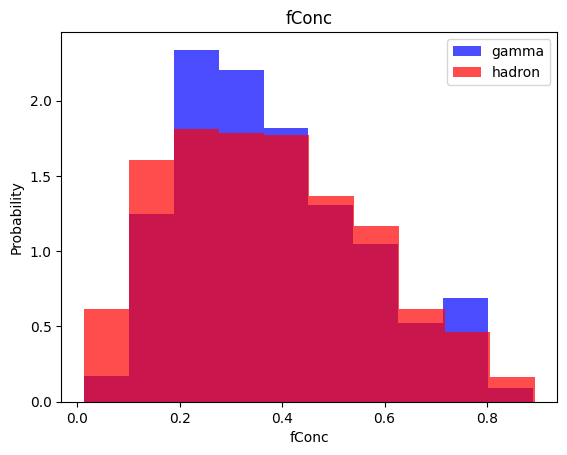

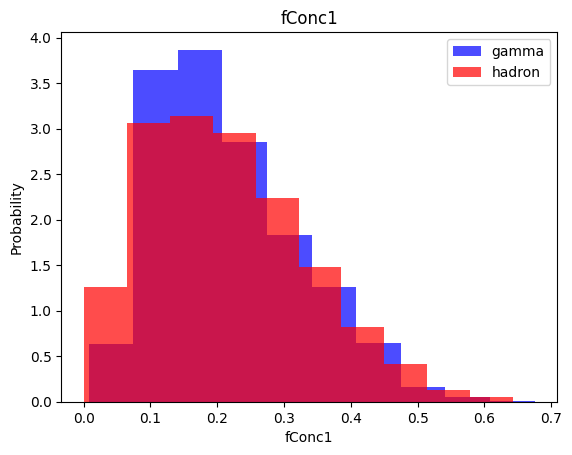

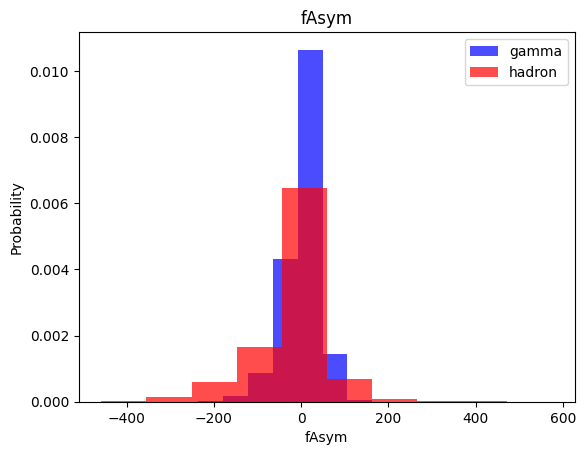

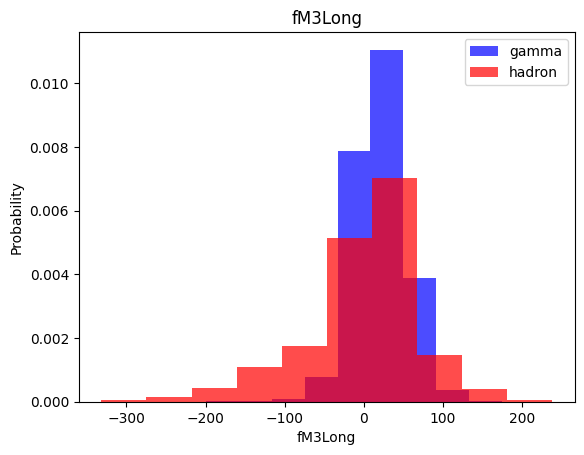

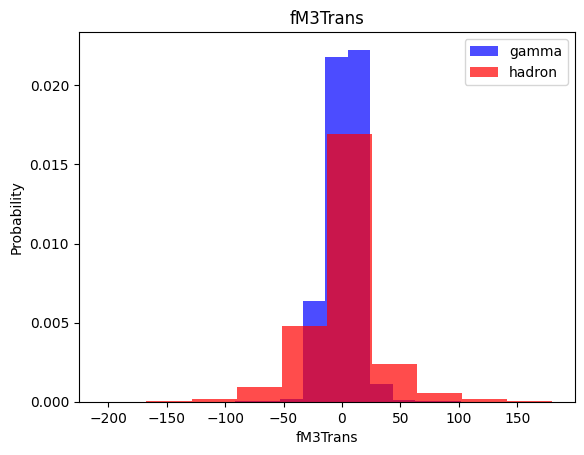

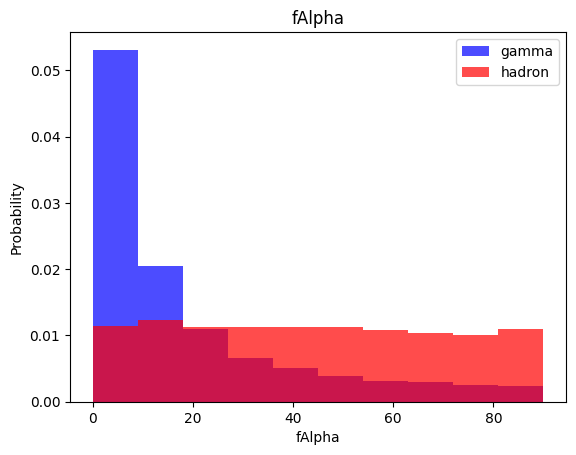

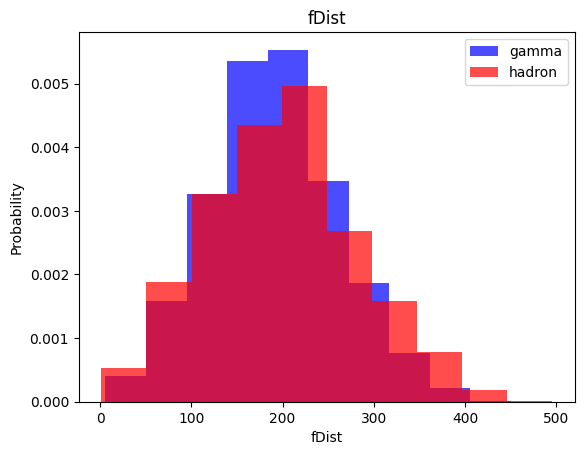

In [4]:
for label in cols[:-1]:
  plt.hist(df[df['class']==0][label], color = 'blue',label = 'gamma', alpha =0.7, density = True)
  plt.hist(df[df['class']==1][label], color = 'red',label = 'hadron', alpha =0.7, density = True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()



### Train, validation, test datasets


In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

### Scaling


In [6]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))
  return data, X, y


In [7]:
train, X_train, y_train = scale_dataset(train, oversample= True)
valid, X_valid, y_valid = scale_dataset(valid, oversample= False)
test, X_test, y_test = scale_dataset(test, oversample= False)

In [8]:
len(y_train), len(X_train)

(14736, 14736)

In [9]:
sum(y_train == 1), sum(y_train == 0)

(7368, 7368)

K nearest neighbor
1. Eucledian distance
distance = sqrt((x1-x2)ˆ2 + (y1-y2)ˆ2)


In [10]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [11]:
y_predict = knn_model.predict(X_test)


In [12]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2469
           1       0.74      0.75      0.74      1335

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804




### Naive Bayes
Naive Bayes algorithm is one of the crucial algorithms in machine learning that helps with classification problems. It is derived from Bayes probability theory and is used for text classification, where you train high dimensional dataset


In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)


In [15]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81      2469
           1       0.68      0.40      0.50      1335

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



### Logistic Regression
It is used for predicting the categorical dependent variable using a given set of independent variable

In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2469
           1       0.68      0.73      0.70      1335

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



### Support Vector Machine (SVM)
Support Vector Machine or SVM is one of the most popular Supervised LEarning Algorithms, which is used for classification as well as Regression Problems.

The Goal of the SVM algorithm is to create th best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put thenew data point in the correct category in the future.
The best decision boundary is called a Hyperplane.

SVM chooses the extreme points/vectors that helps creating teh hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine

In [18]:
from sklearn.svm import SVC


In [19]:
svc = SVC()
svc = svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2469
           1       0.80      0.79      0.79      1335

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



### Neural Network
A neural network is a method in artificial intelligence that teaches computers to process data in a way that is inspired by human brain.
Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, conects to another and has an associated weight and threshold. If teh putput of any individual node is above the specified threshold value, that node is activated, sending data to teh next layer of the network. Otherwise, no data is passed along to the next layer of the network.

There are 3 types of learning in neural network:

1. Supervised learning
2. Unsupervised learning
3. Reinforcement learning

In [20]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras


In [21]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 7))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'],label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel("Binary CrossEntropy")
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label = 'val+accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()



In [23]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = keras.Sequential([
      layers.Dense(64, activation = 'relu', input_shape=(10, )),
      layers.Dropout(dropout_prob),
      layers.Dense(32, activation ='relu'),
      layers.Dropout(dropout_prob),
      layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
  history = nn_model.fit(X_train, y_train,
                       epochs = epochs, batch_size = batch_size,
                       validation_split= 0.2,
                         verbose = 0)
  return nn_model, history

16 nodes, dropout 0, lr is 0.1, batch_size is 32


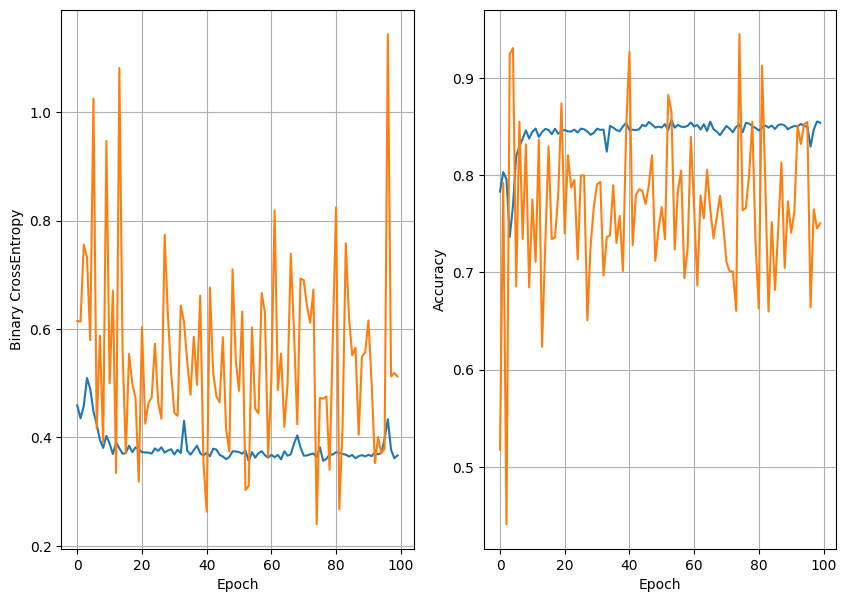

119/119 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8583
16 nodes, dropout 0, lr is 0.1, batch_size is 64


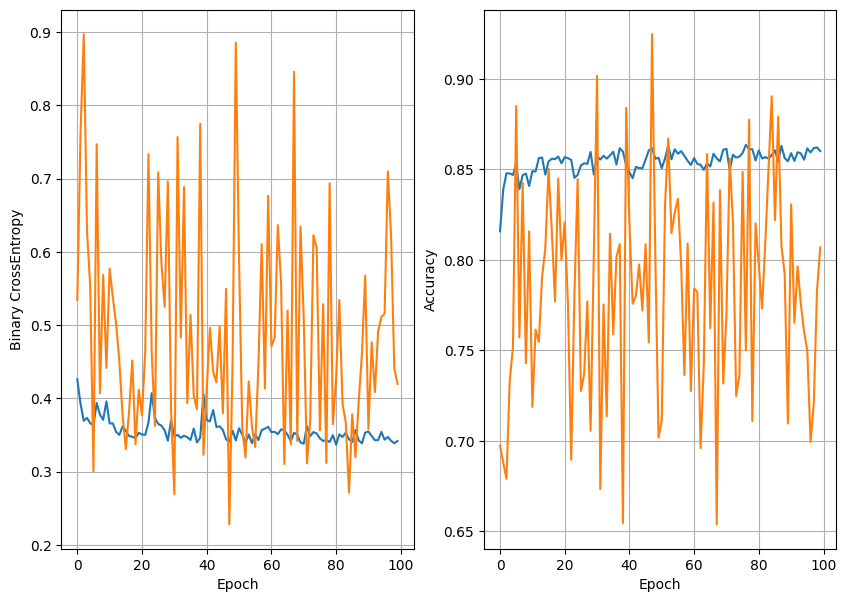

119/119 [==============================] - 0s 2ms/step - loss: 0.3434 - accuracy: 0.8525
16 nodes, dropout 0, lr is 0.1, batch_size is 128


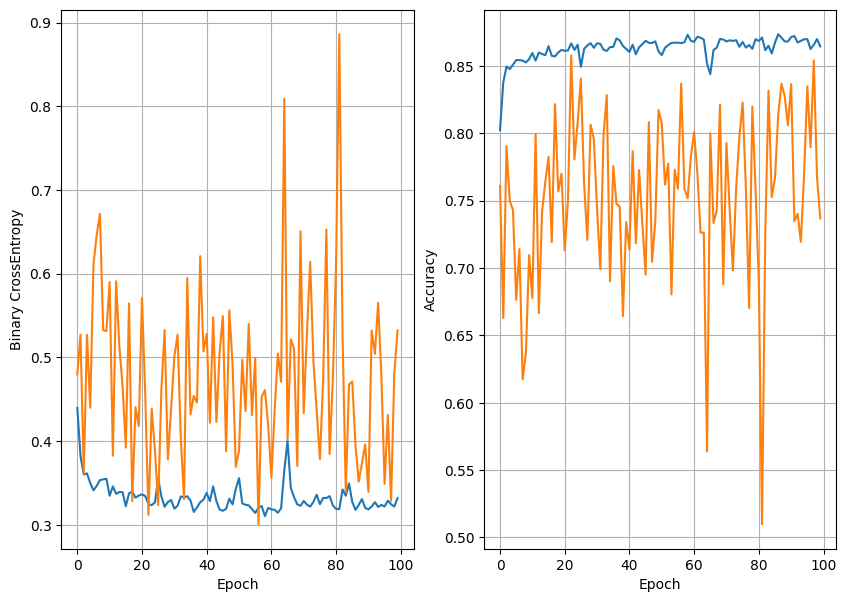

119/119 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.8646
16 nodes, dropout 0, lr is 0.005, batch_size is 32


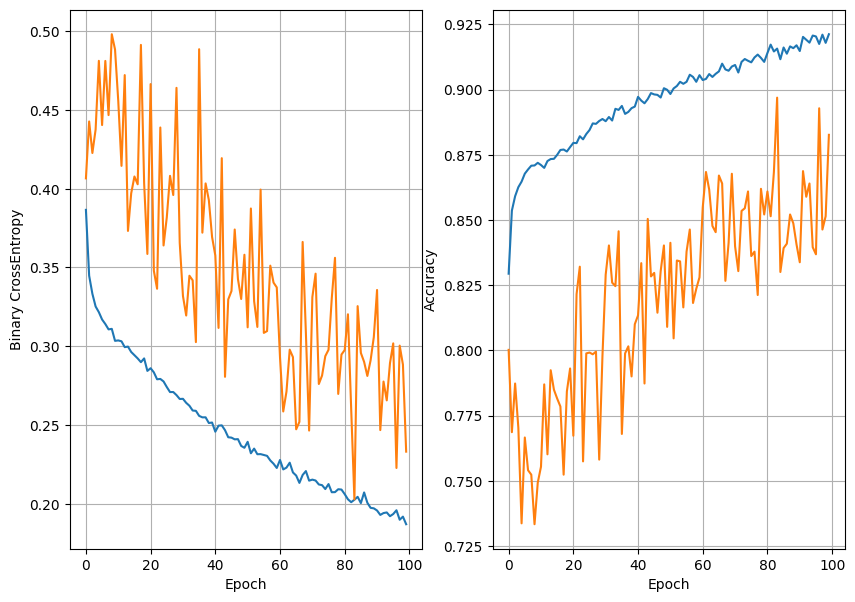

119/119 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.8512
16 nodes, dropout 0, lr is 0.005, batch_size is 64


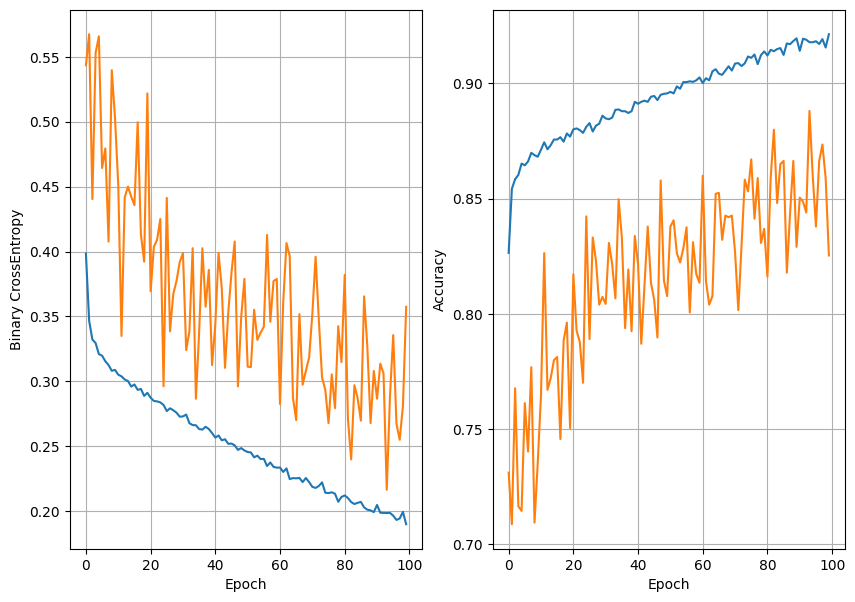

119/119 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8633
16 nodes, dropout 0, lr is 0.005, batch_size is 128


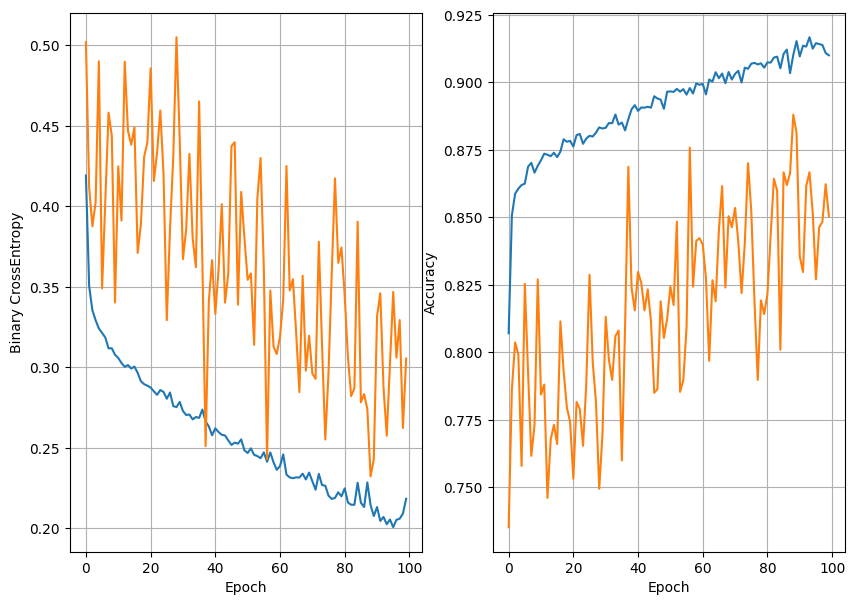

119/119 [==============================] - 0s 3ms/step - loss: 0.4113 - accuracy: 0.8565
16 nodes, dropout 0, lr is 0.001, batch_size is 32


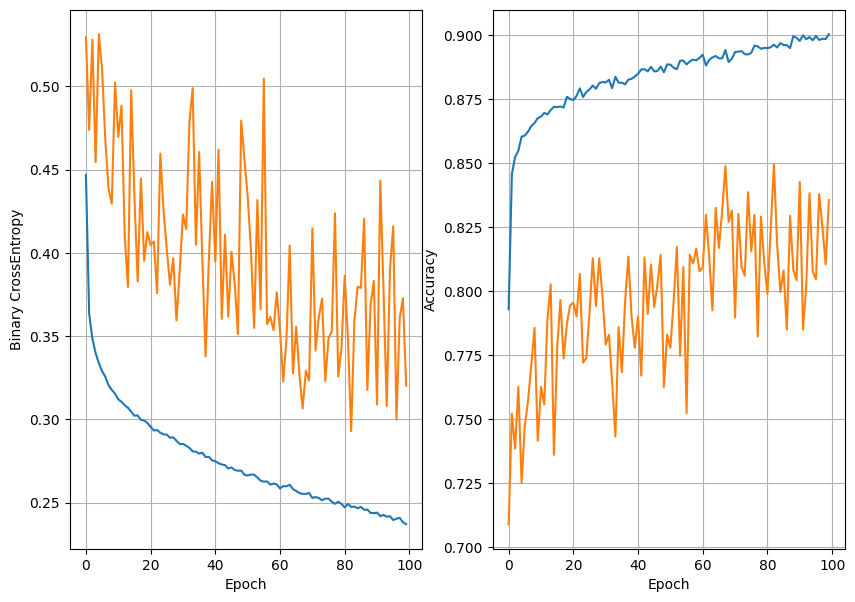

119/119 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8588
16 nodes, dropout 0, lr is 0.001, batch_size is 64


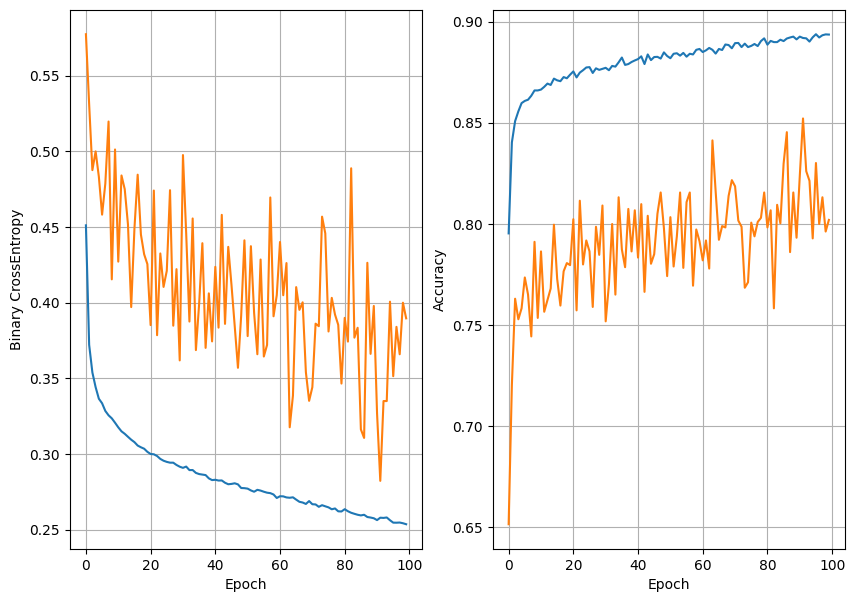

119/119 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8686
16 nodes, dropout 0, lr is 0.001, batch_size is 128


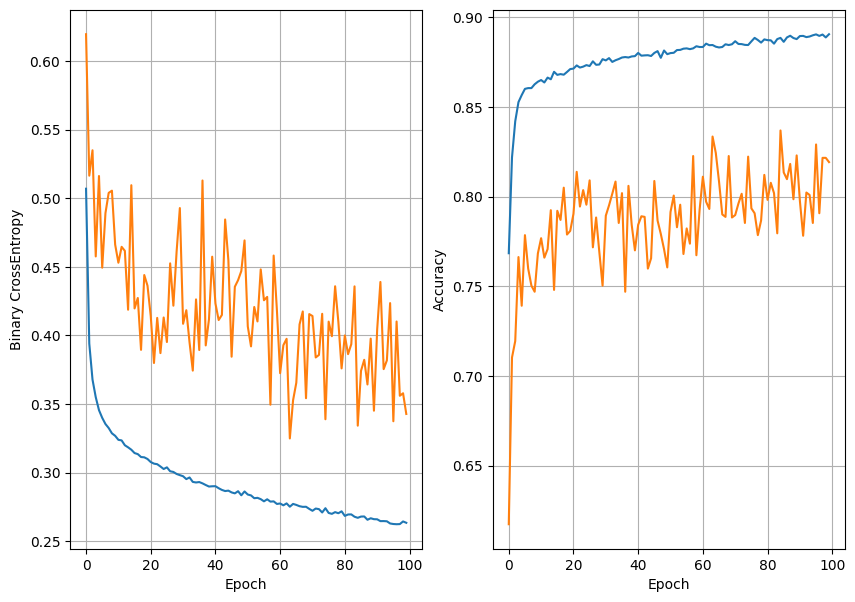

119/119 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8601
16 nodes, dropout 0.2, lr is 0.1, batch_size is 32


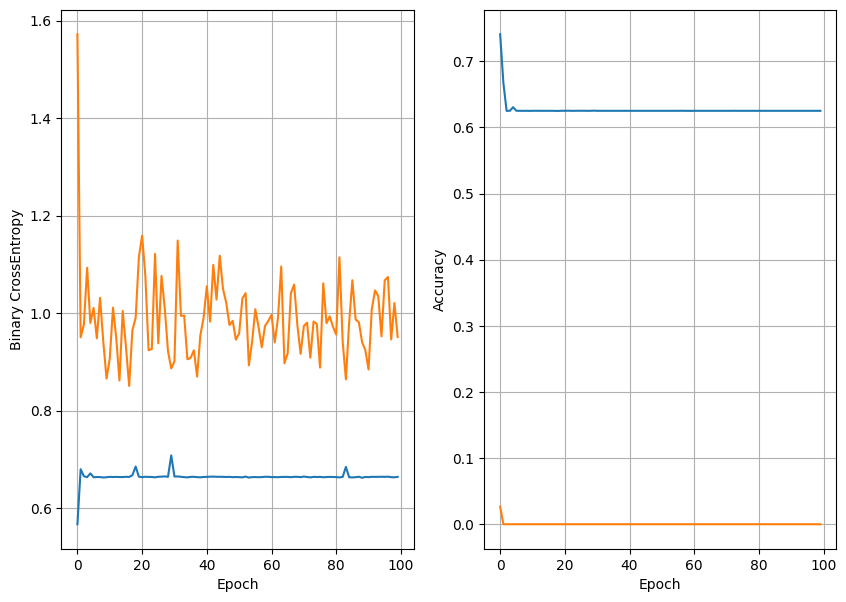

119/119 [==============================] - 0s 3ms/step - loss: 0.6476 - accuracy: 0.6559
16 nodes, dropout 0.2, lr is 0.1, batch_size is 64


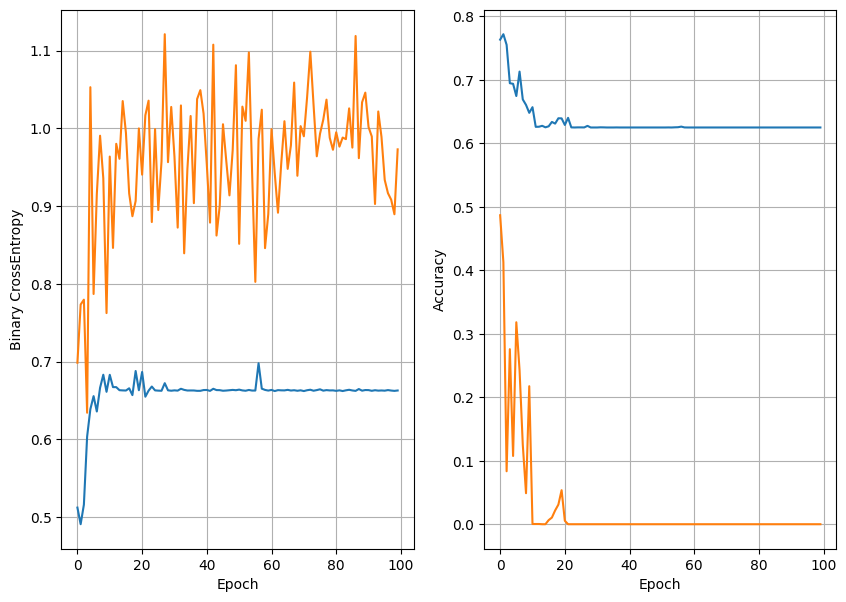

119/119 [==============================] - 0s 3ms/step - loss: 0.6462 - accuracy: 0.6559
16 nodes, dropout 0.2, lr is 0.1, batch_size is 128


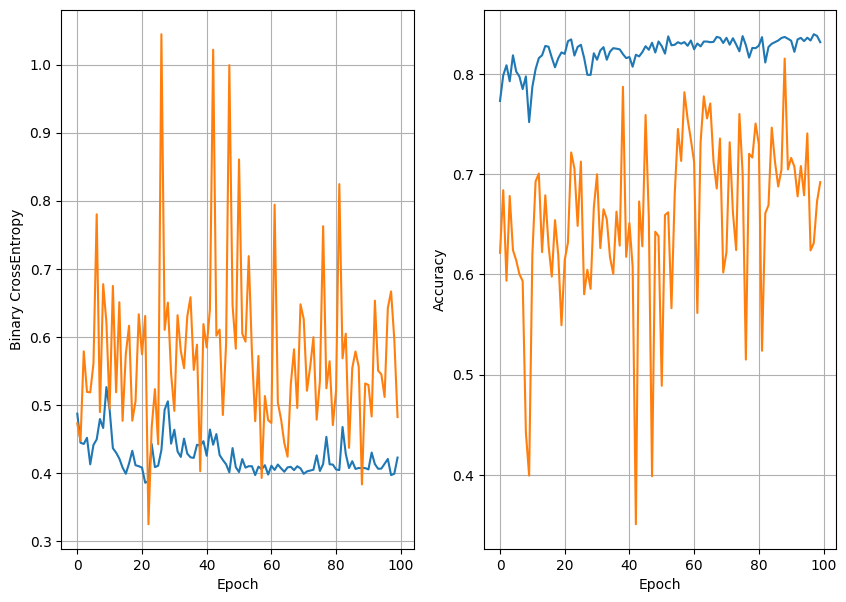

119/119 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8601
16 nodes, dropout 0.2, lr is 0.005, batch_size is 32


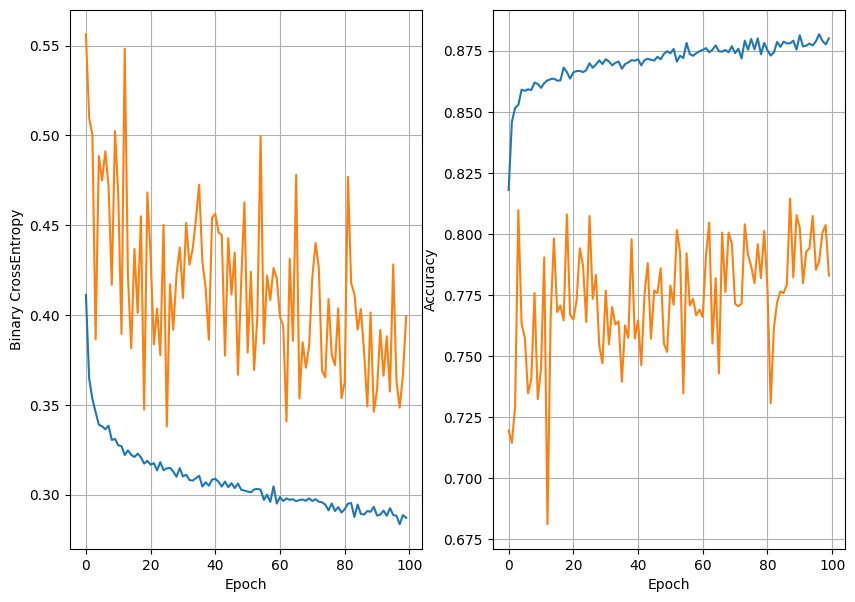

119/119 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.8667
16 nodes, dropout 0.2, lr is 0.005, batch_size is 64


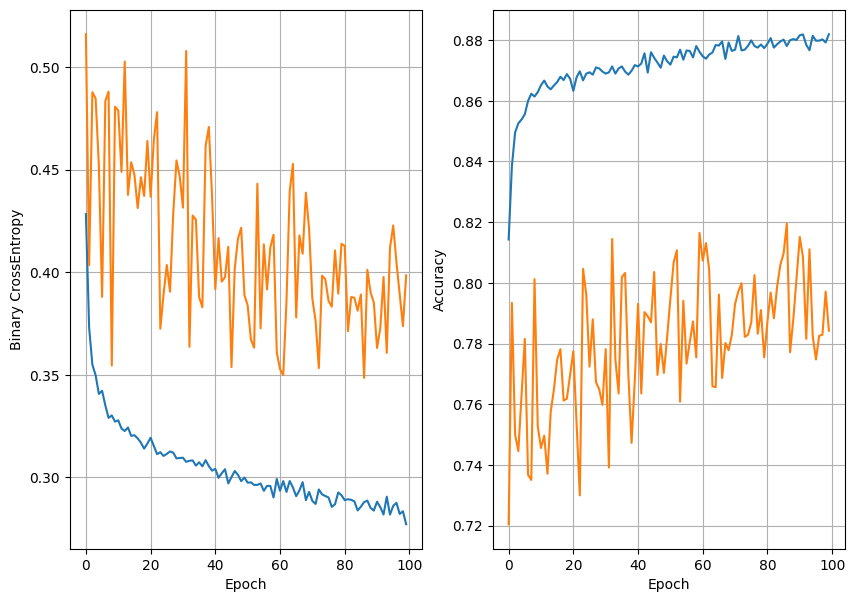

119/119 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8730
16 nodes, dropout 0.2, lr is 0.005, batch_size is 128


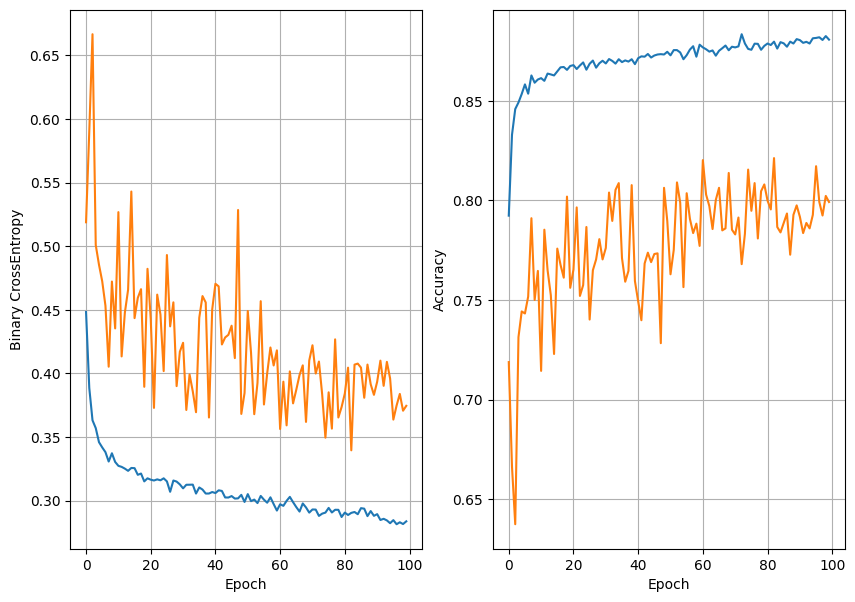

119/119 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.8717
16 nodes, dropout 0.2, lr is 0.001, batch_size is 32


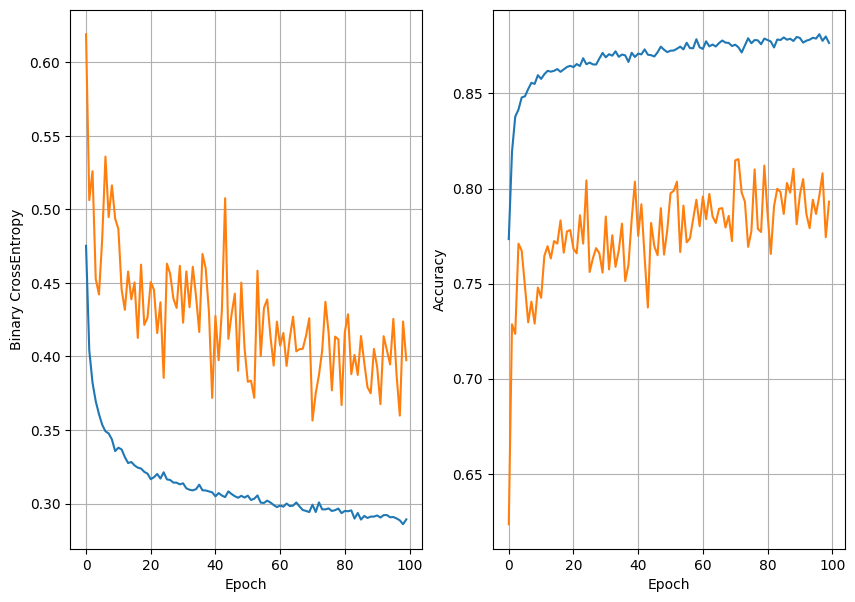

119/119 [==============================] - 0s 3ms/step - loss: 0.3064 - accuracy: 0.8717
16 nodes, dropout 0.2, lr is 0.001, batch_size is 64


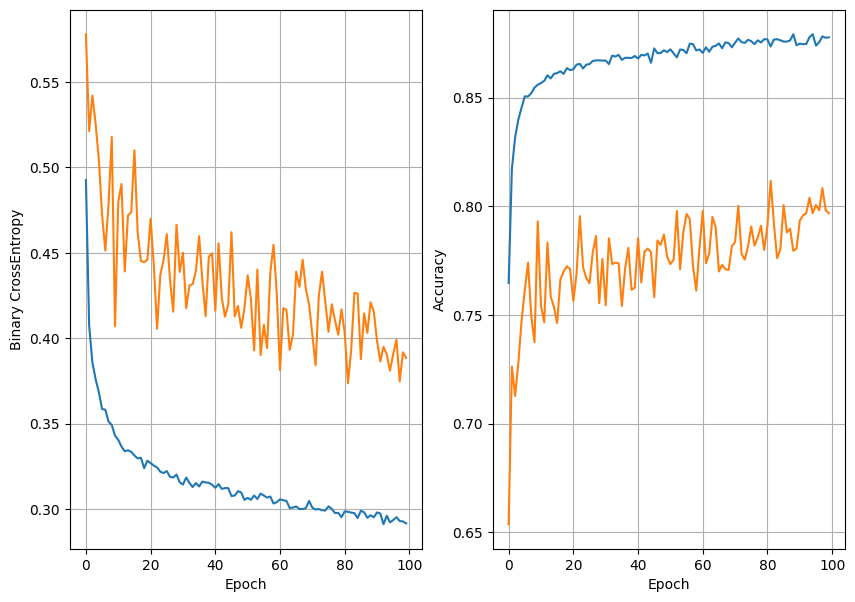

119/119 [==============================] - 0s 3ms/step - loss: 0.3088 - accuracy: 0.8704
16 nodes, dropout 0.2, lr is 0.001, batch_size is 128


119/119 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 0.8709
32 nodes, dropout 0, lr is 0.1, batch_size is 32


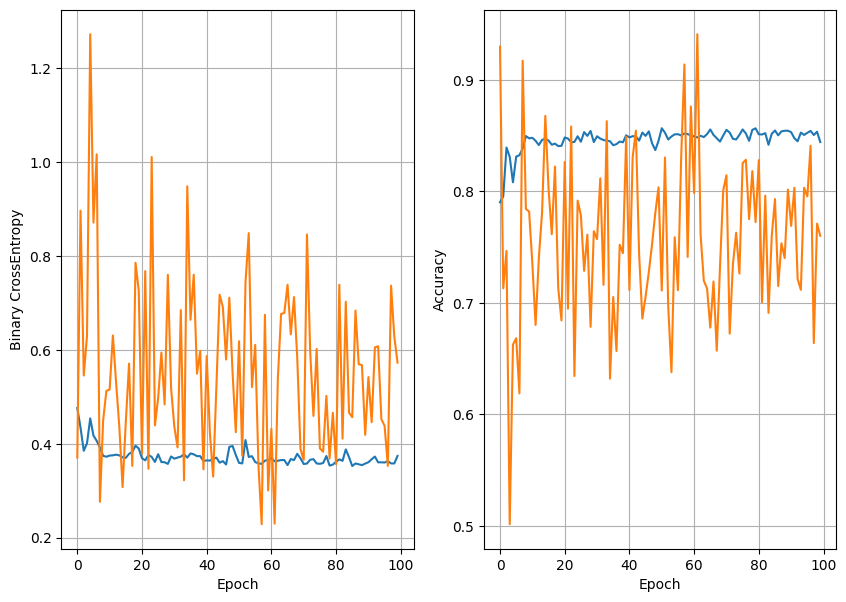

119/119 [==============================] - 0s 3ms/step - loss: 0.3785 - accuracy: 0.8462
32 nodes, dropout 0, lr is 0.1, batch_size is 64


119/119 [==============================] - 0s 3ms/step - loss: 0.4118 - accuracy: 0.8538
32 nodes, dropout 0, lr is 0.1, batch_size is 128


119/119 [==============================] - 0s 3ms/step - loss: 0.3601 - accuracy: 0.8594
32 nodes, dropout 0, lr is 0.005, batch_size is 32


119/119 [==============================] - 0s 3ms/step - loss: 0.5551 - accuracy: 0.8546
32 nodes, dropout 0, lr is 0.005, batch_size is 64


119/119 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.8465
32 nodes, dropout 0, lr is 0.005, batch_size is 128


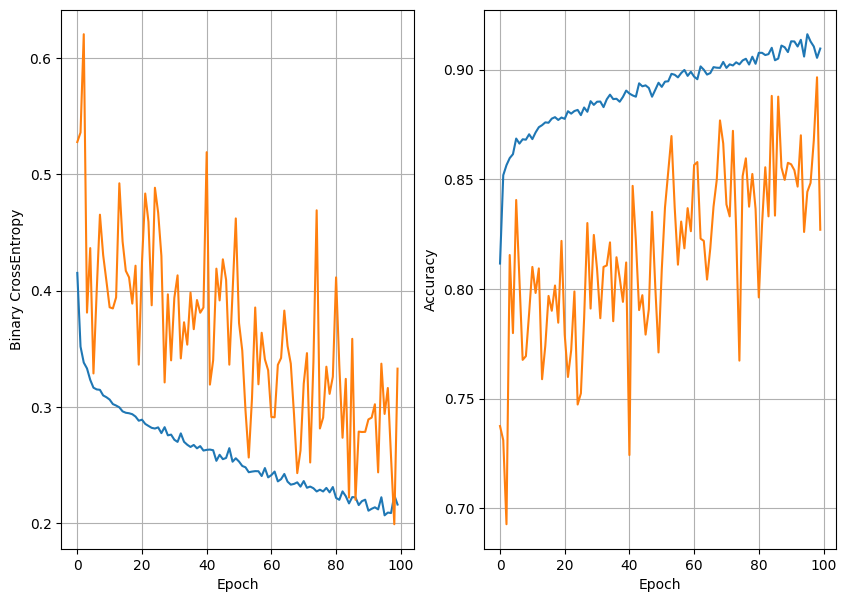

119/119 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8667
32 nodes, dropout 0, lr is 0.001, batch_size is 32


119/119 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8686
32 nodes, dropout 0, lr is 0.001, batch_size is 64


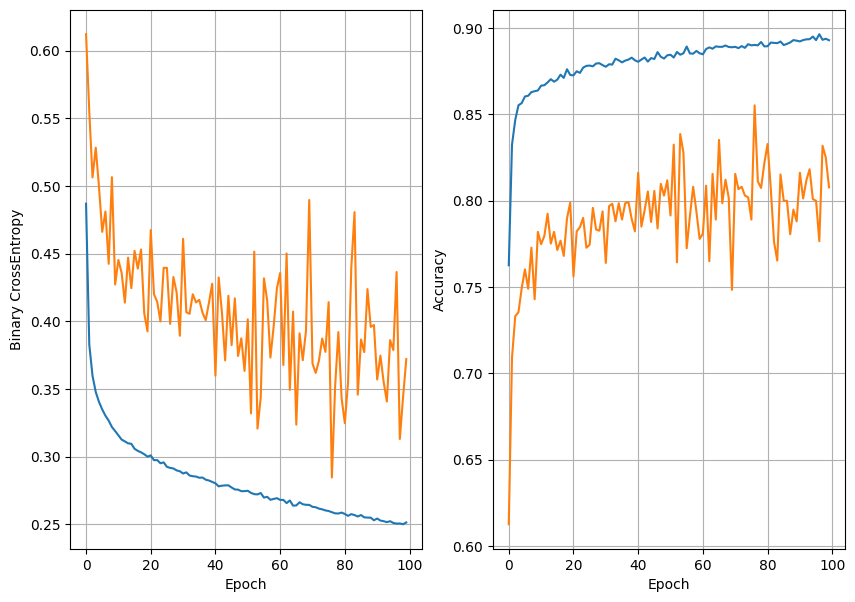

119/119 [==============================] - 0s 3ms/step - loss: 0.3301 - accuracy: 0.8678
32 nodes, dropout 0, lr is 0.001, batch_size is 128


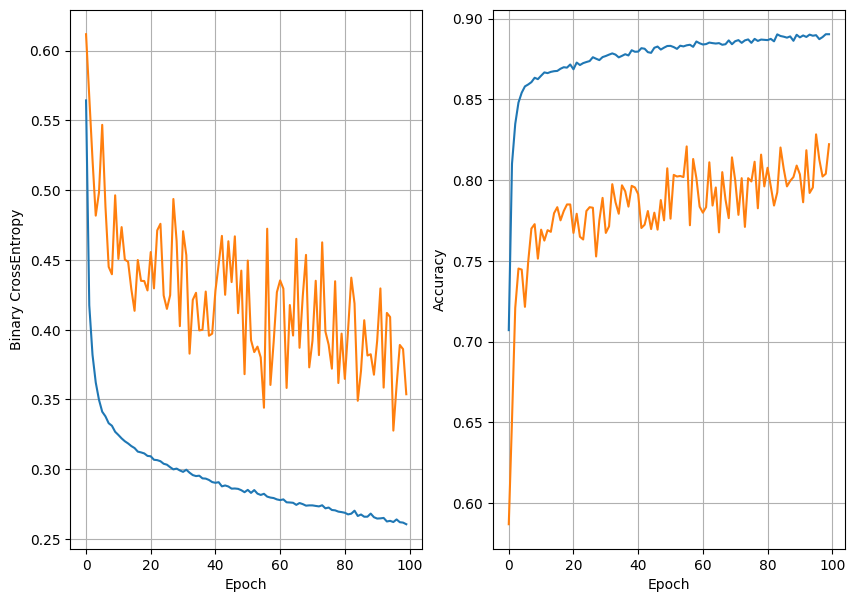

119/119 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.8625
32 nodes, dropout 0.2, lr is 0.1, batch_size is 32


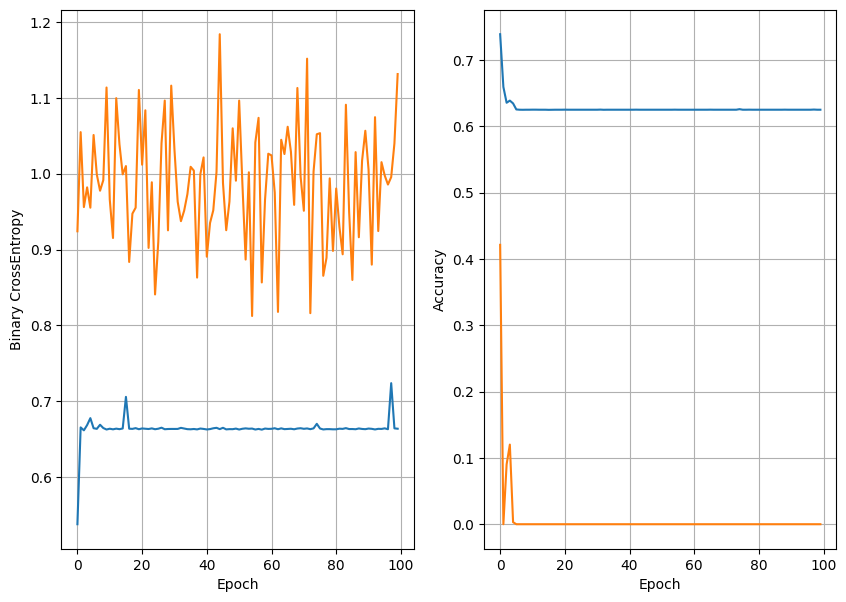

119/119 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.6559
32 nodes, dropout 0.2, lr is 0.1, batch_size is 64


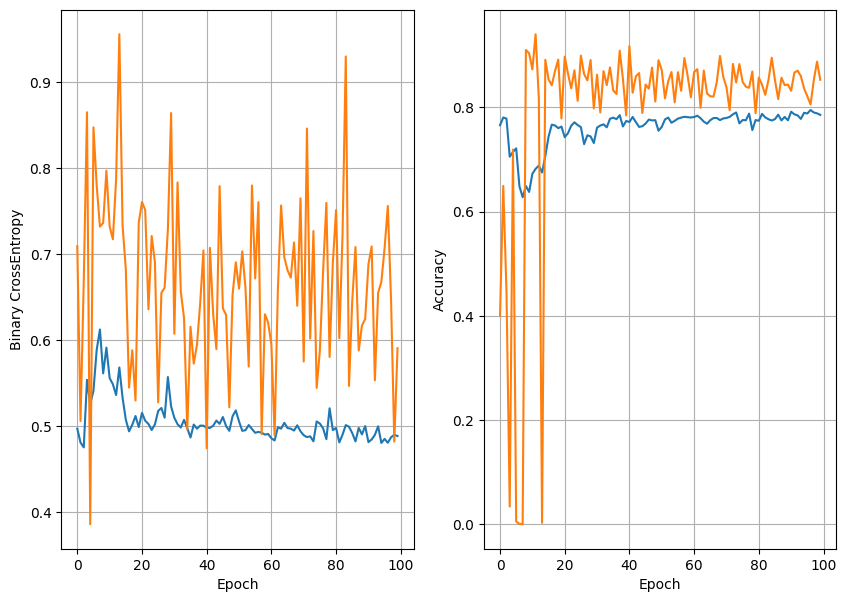

119/119 [==============================] - 0s 3ms/step - loss: 0.4411 - accuracy: 0.7968
32 nodes, dropout 0.2, lr is 0.1, batch_size is 128


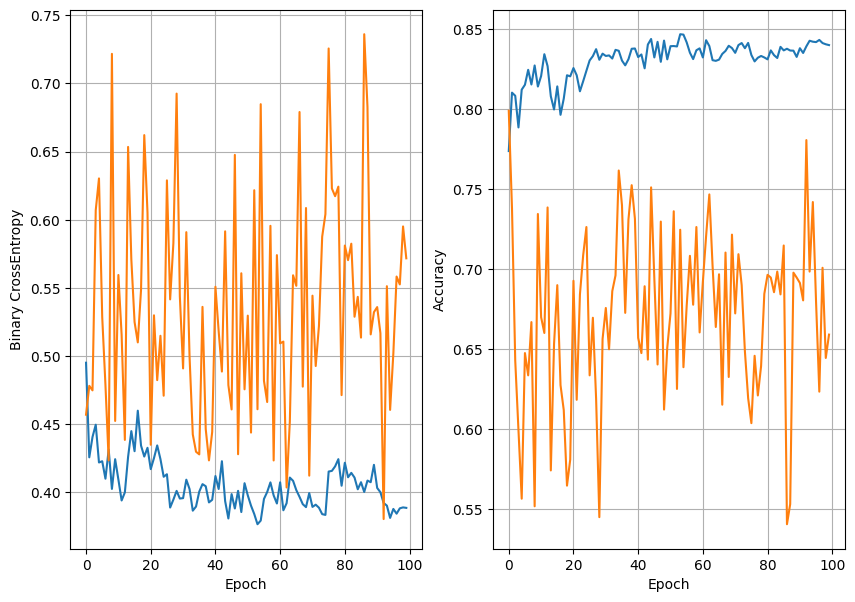

119/119 [==============================] - 0s 3ms/step - loss: 0.3561 - accuracy: 0.8580
32 nodes, dropout 0.2, lr is 0.005, batch_size is 32


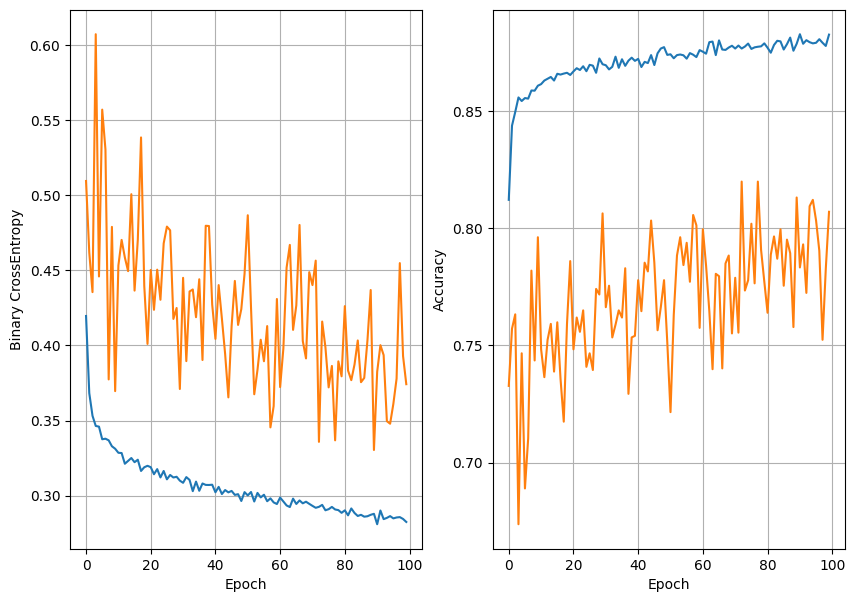

119/119 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8715
32 nodes, dropout 0.2, lr is 0.005, batch_size is 64


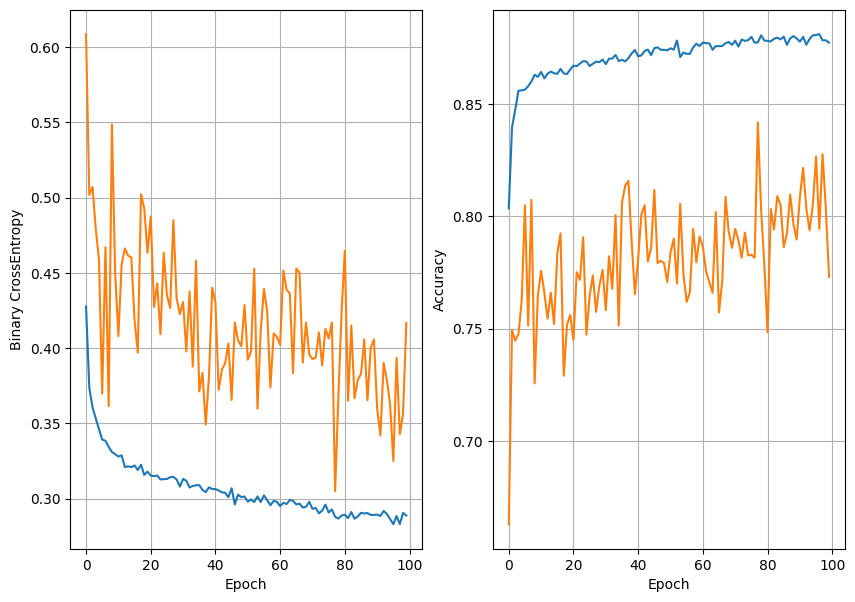

119/119 [==============================] - 0s 3ms/step - loss: 0.3038 - accuracy: 0.8709
32 nodes, dropout 0.2, lr is 0.005, batch_size is 128


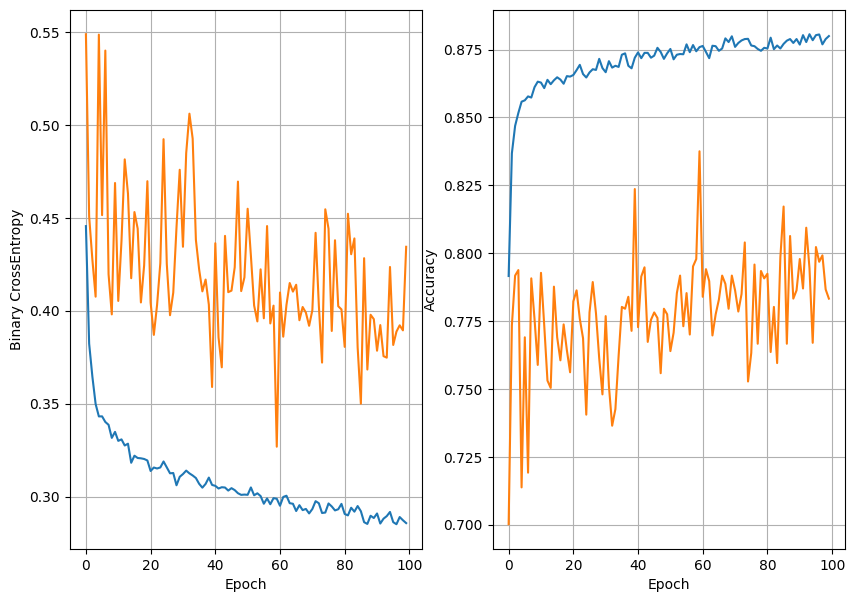

119/119 [==============================] - 0s 3ms/step - loss: 0.3092 - accuracy: 0.8725
32 nodes, dropout 0.2, lr is 0.001, batch_size is 32


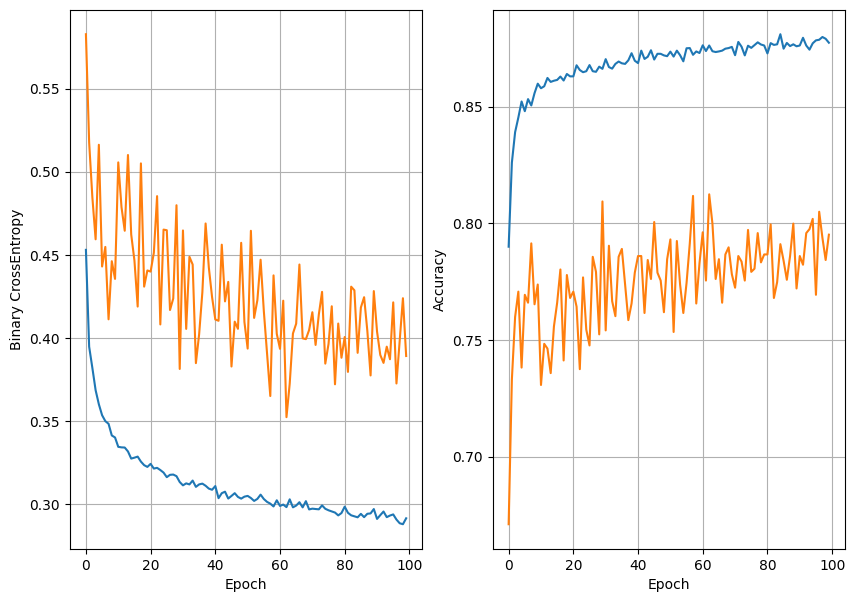

119/119 [==============================] - 0s 3ms/step - loss: 0.3090 - accuracy: 0.8741
32 nodes, dropout 0.2, lr is 0.001, batch_size is 64


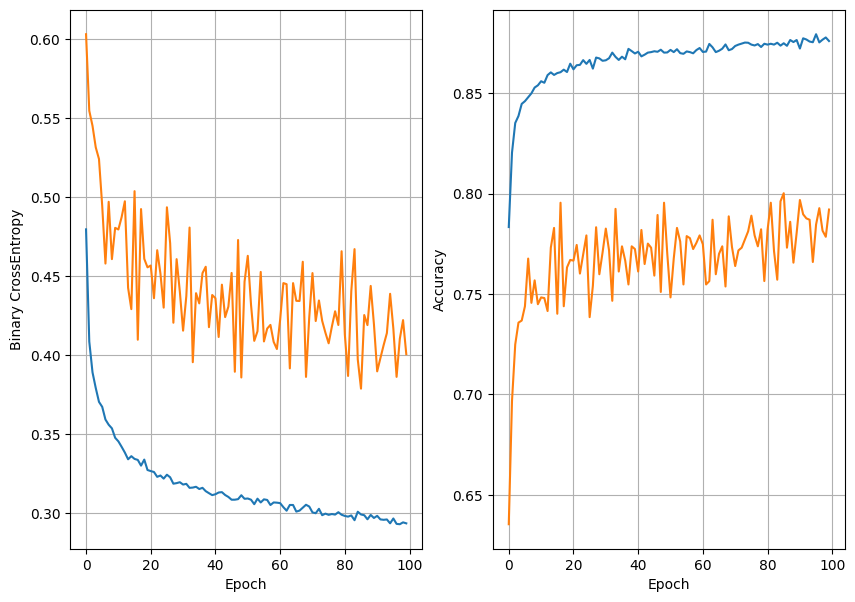

119/119 [==============================] - 0s 4ms/step - loss: 0.3070 - accuracy: 0.8722
32 nodes, dropout 0.2, lr is 0.001, batch_size is 128


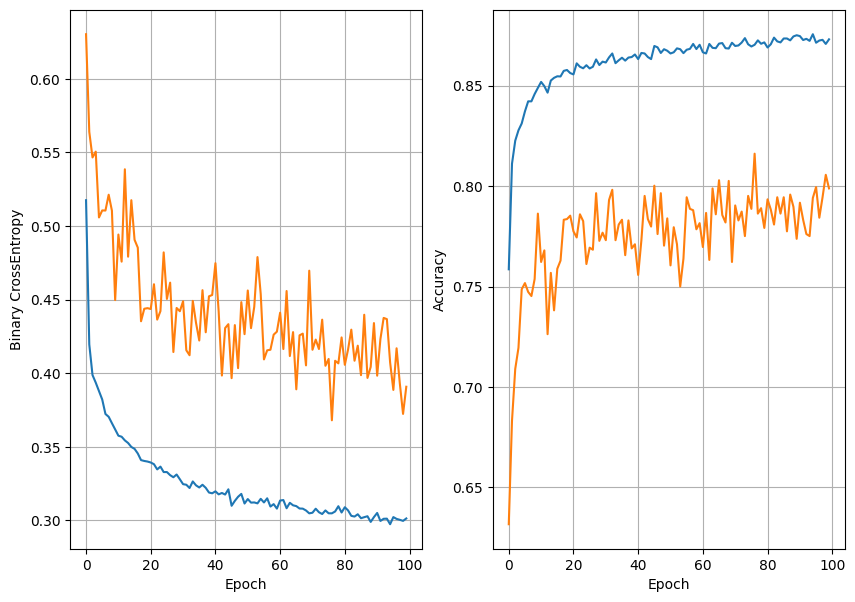

119/119 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8657
64 nodes, dropout 0, lr is 0.1, batch_size is 32


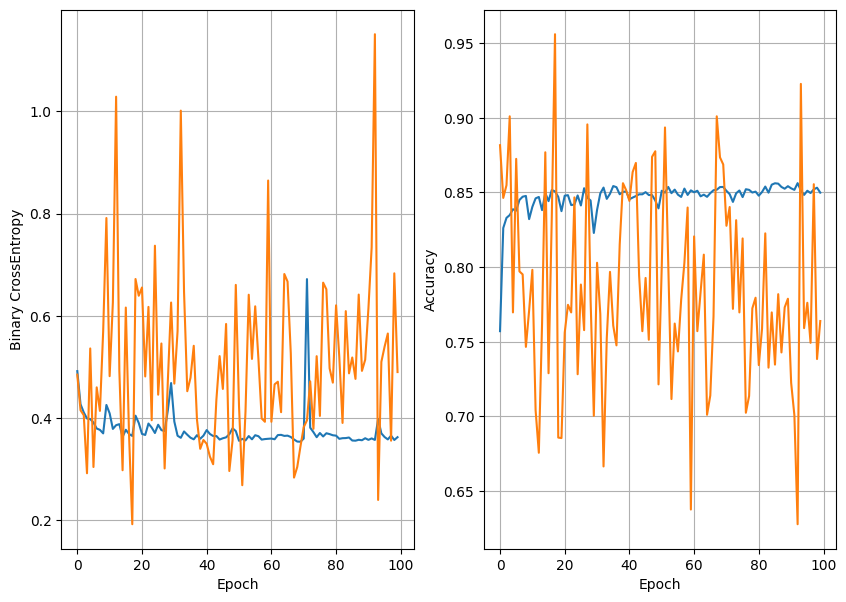

119/119 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.8620
64 nodes, dropout 0, lr is 0.1, batch_size is 64


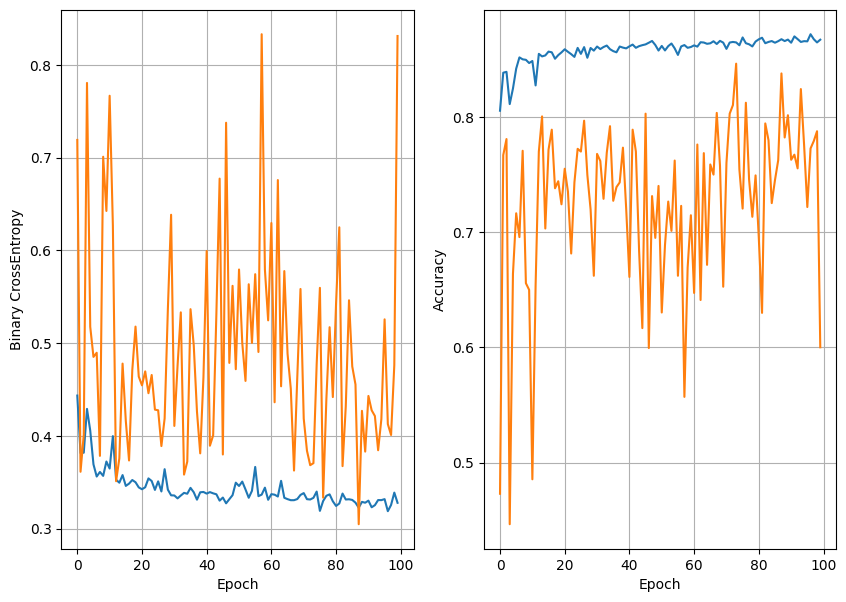

119/119 [==============================] - 0s 3ms/step - loss: 0.4007 - accuracy: 0.8475
64 nodes, dropout 0, lr is 0.1, batch_size is 128


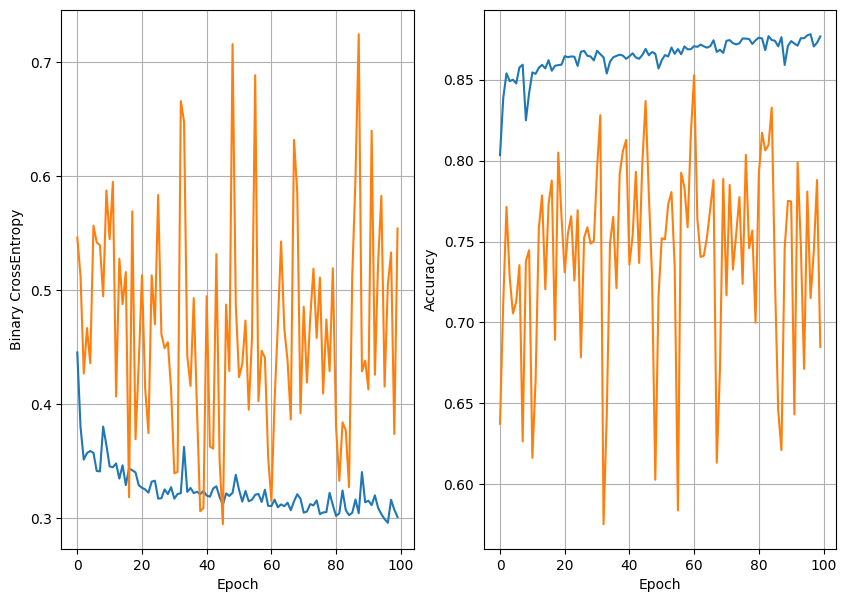

119/119 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8667
64 nodes, dropout 0, lr is 0.005, batch_size is 32


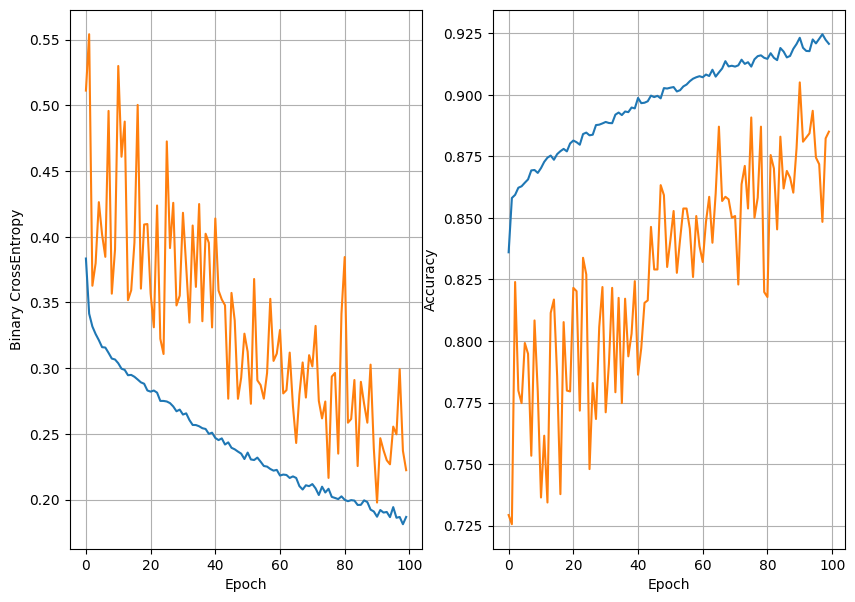

119/119 [==============================] - 0s 3ms/step - loss: 0.4852 - accuracy: 0.8481
64 nodes, dropout 0, lr is 0.005, batch_size is 64


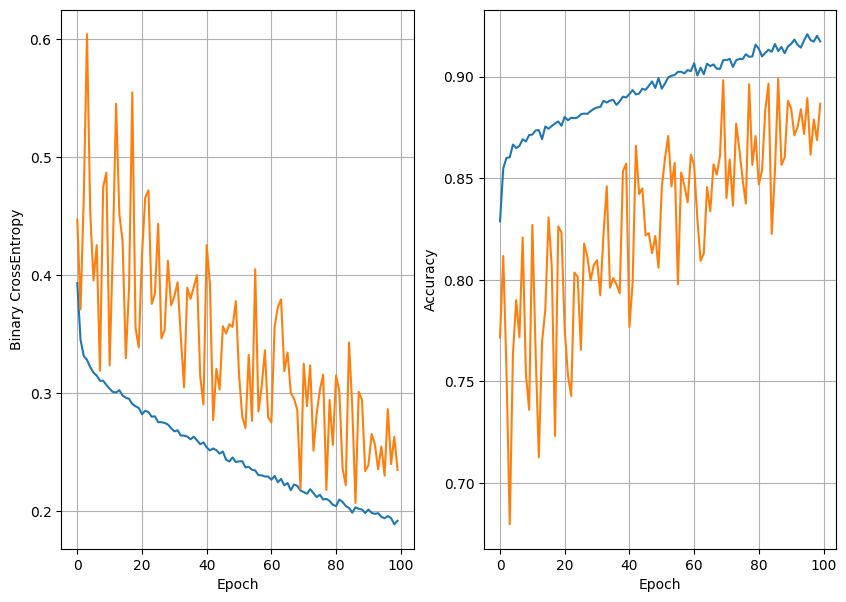

119/119 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.8523
64 nodes, dropout 0, lr is 0.005, batch_size is 128


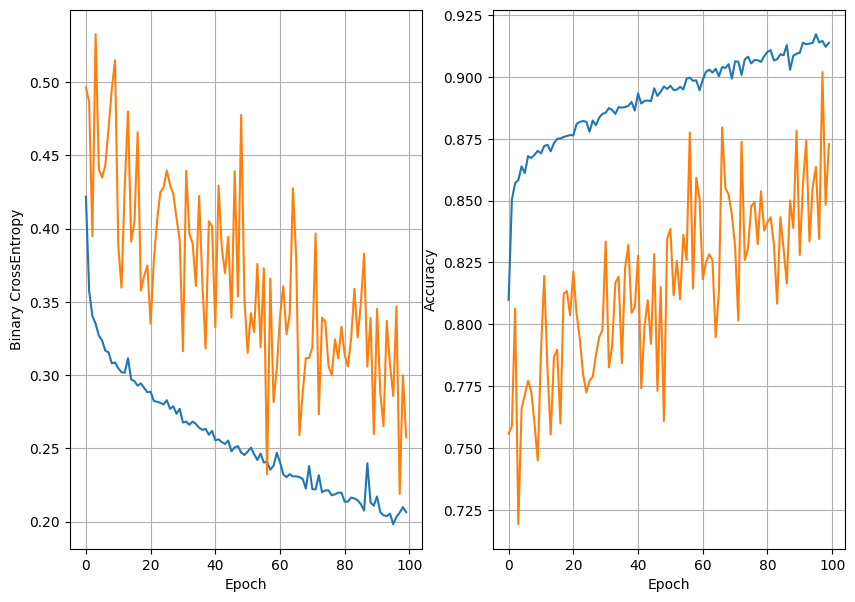

119/119 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.8549
64 nodes, dropout 0, lr is 0.001, batch_size is 32


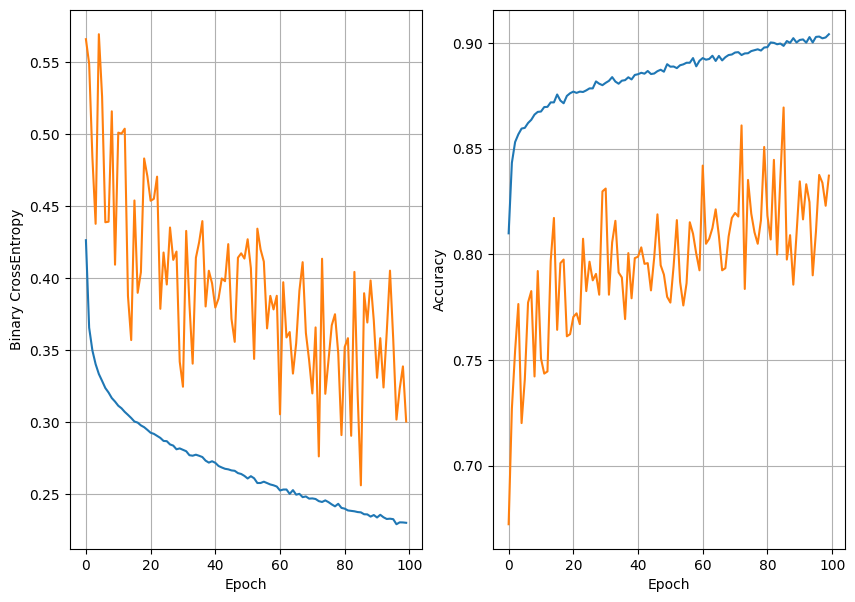

119/119 [==============================] - 0s 3ms/step - loss: 0.3497 - accuracy: 0.8620
64 nodes, dropout 0, lr is 0.001, batch_size is 64


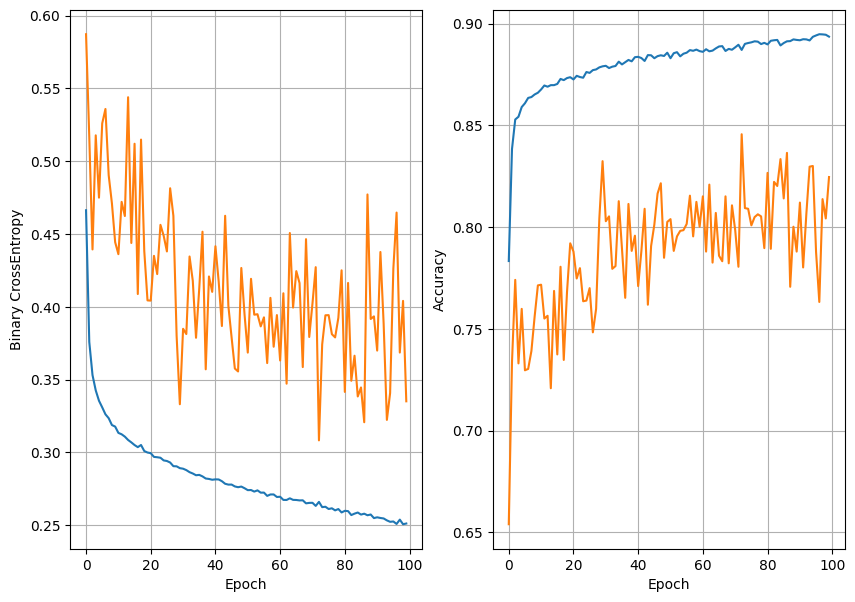

119/119 [==============================] - 0s 3ms/step - loss: 0.3325 - accuracy: 0.8699
64 nodes, dropout 0, lr is 0.001, batch_size is 128


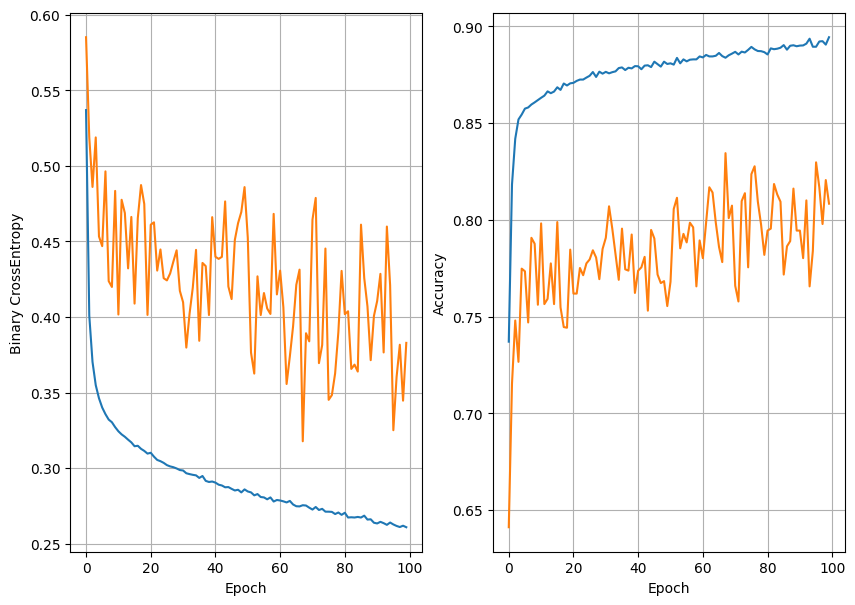

119/119 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8665
64 nodes, dropout 0.2, lr is 0.1, batch_size is 32


119/119 [==============================] - 0s 4ms/step - loss: 0.6461 - accuracy: 0.6559
64 nodes, dropout 0.2, lr is 0.1, batch_size is 64


119/119 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.8549
64 nodes, dropout 0.2, lr is 0.1, batch_size is 128


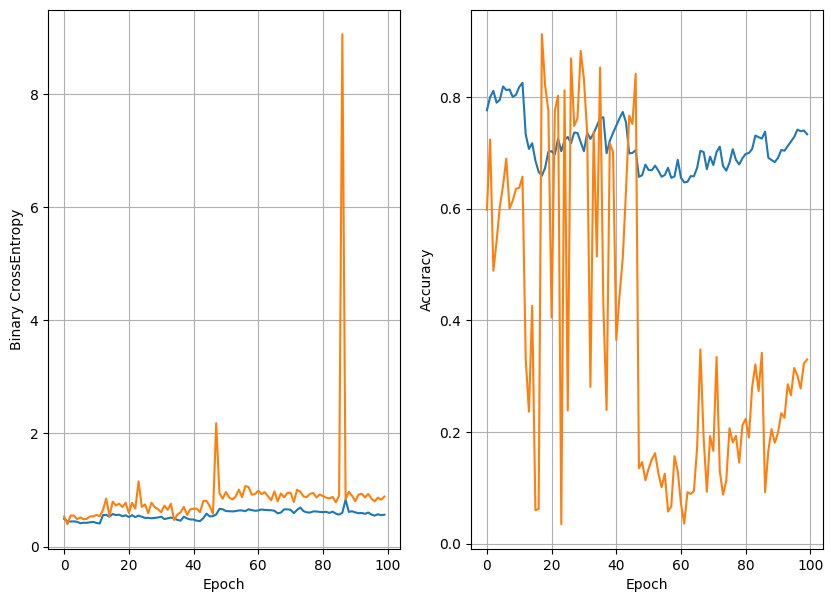

119/119 [==============================] - 0s 3ms/step - loss: 0.5366 - accuracy: 0.7597
64 nodes, dropout 0.2, lr is 0.005, batch_size is 32


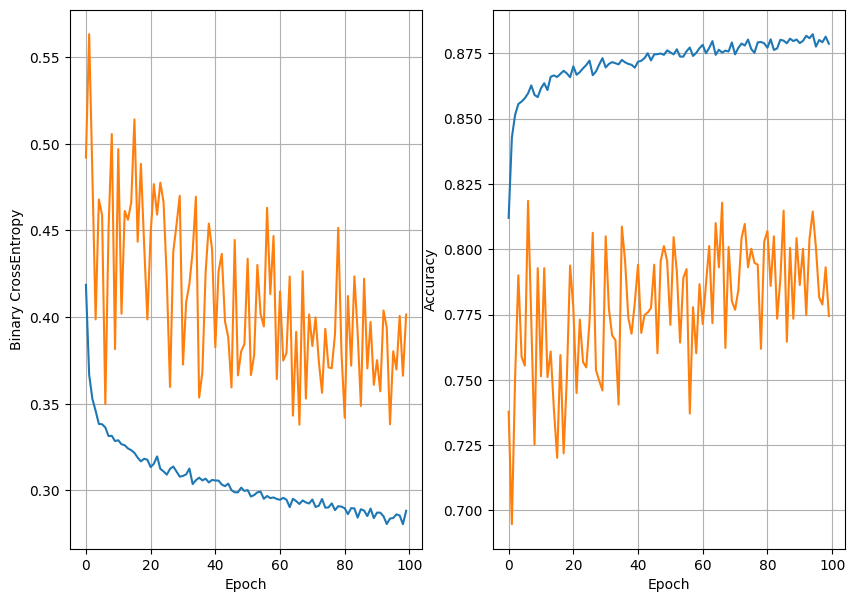

119/119 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8749
64 nodes, dropout 0.2, lr is 0.005, batch_size is 64


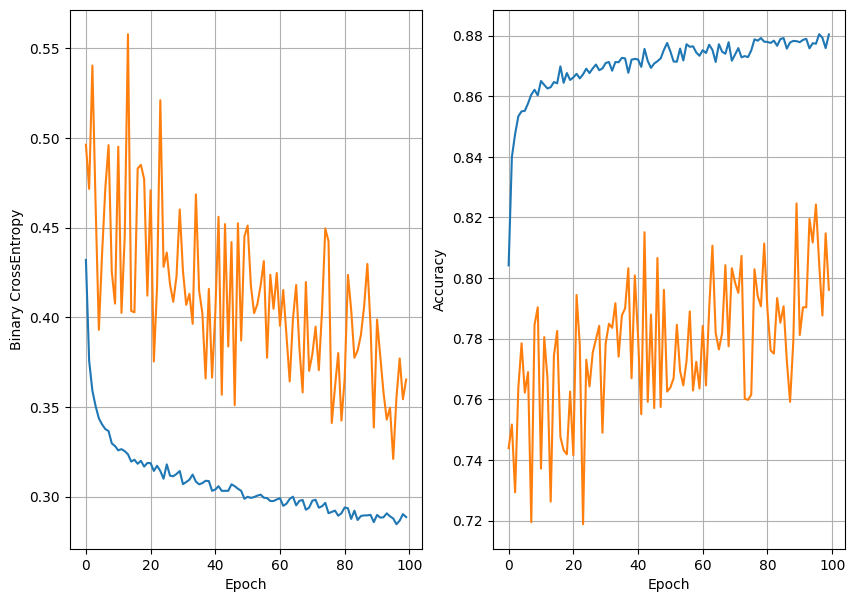

119/119 [==============================] - 0s 3ms/step - loss: 0.3118 - accuracy: 0.8722
64 nodes, dropout 0.2, lr is 0.005, batch_size is 128


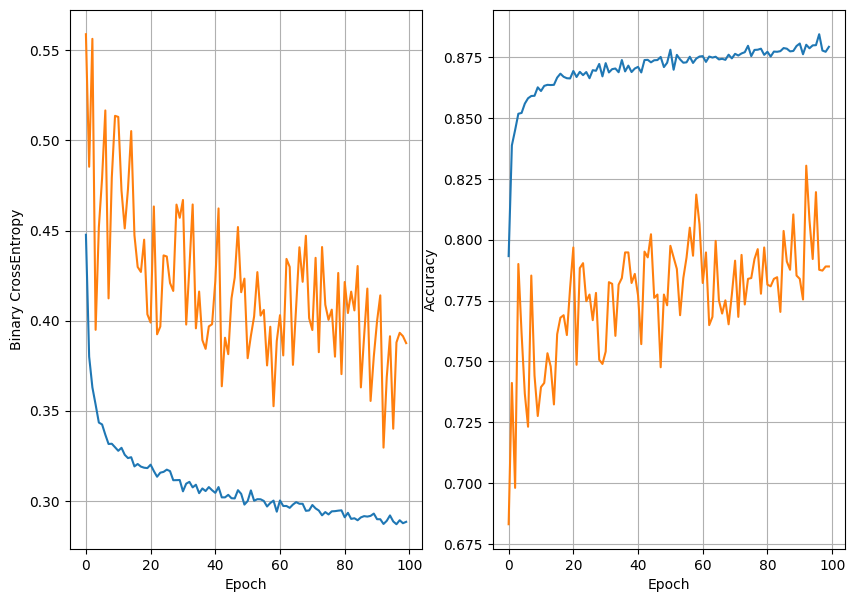

119/119 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.8707
64 nodes, dropout 0.2, lr is 0.001, batch_size is 32


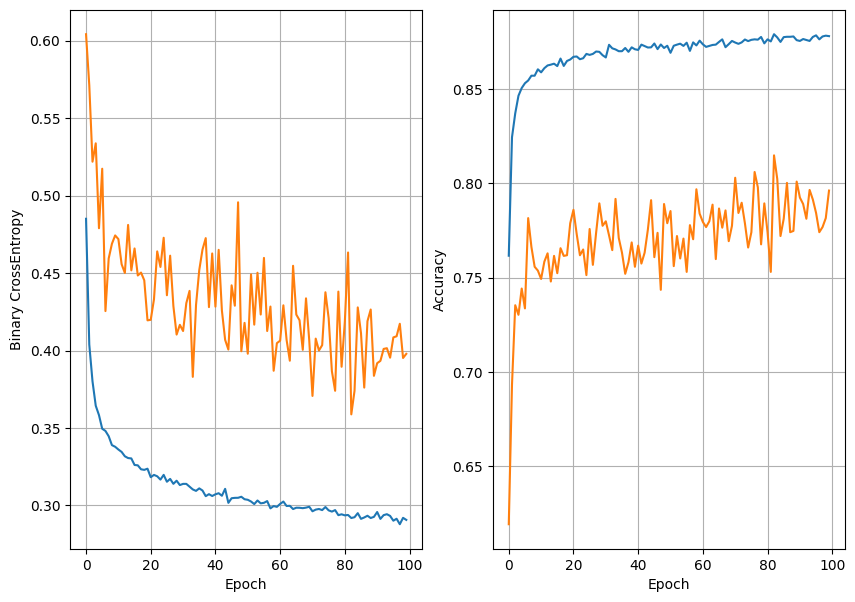

119/119 [==============================] - 0s 3ms/step - loss: 0.3101 - accuracy: 0.8715
64 nodes, dropout 0.2, lr is 0.001, batch_size is 64


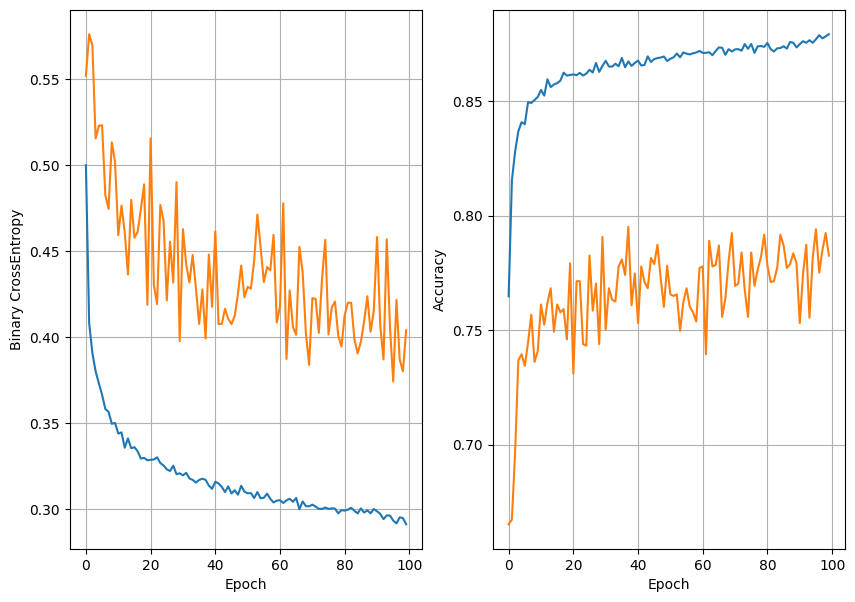

119/119 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.8672
64 nodes, dropout 0.2, lr is 0.001, batch_size is 128


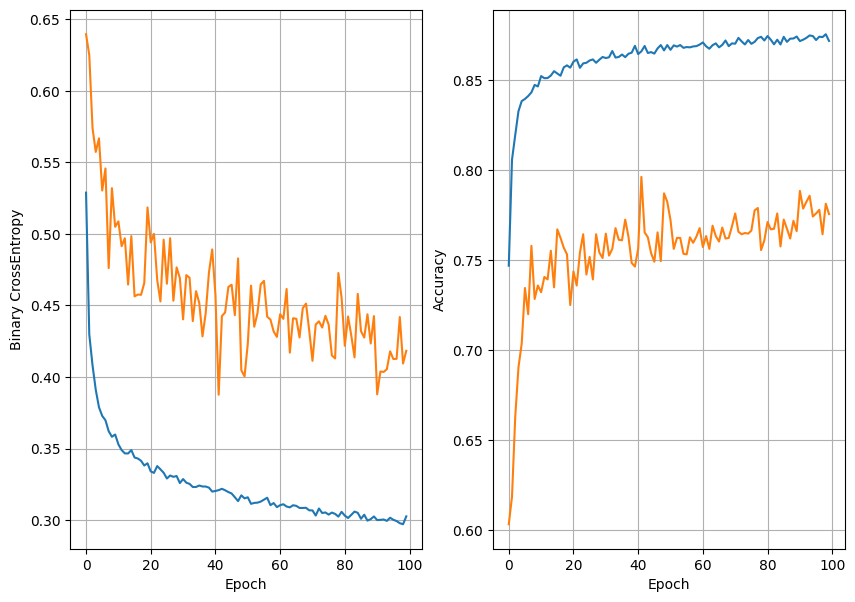

119/119 [==============================] - 0s 3ms/step - loss: 0.3075 - accuracy: 0.8712


In [24]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.005, 0.001 ]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr is {lr}, batch_size is {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs )
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss

          least_loss_model = model

In [27]:
y_pred  = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 2ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2469
           1       0.89      0.76      0.82      1335

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

